In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kagrf.csv to kagrf (1).csv


In [0]:
data = pd.read_csv("/content/kagrf.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


In [0]:
#data description
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

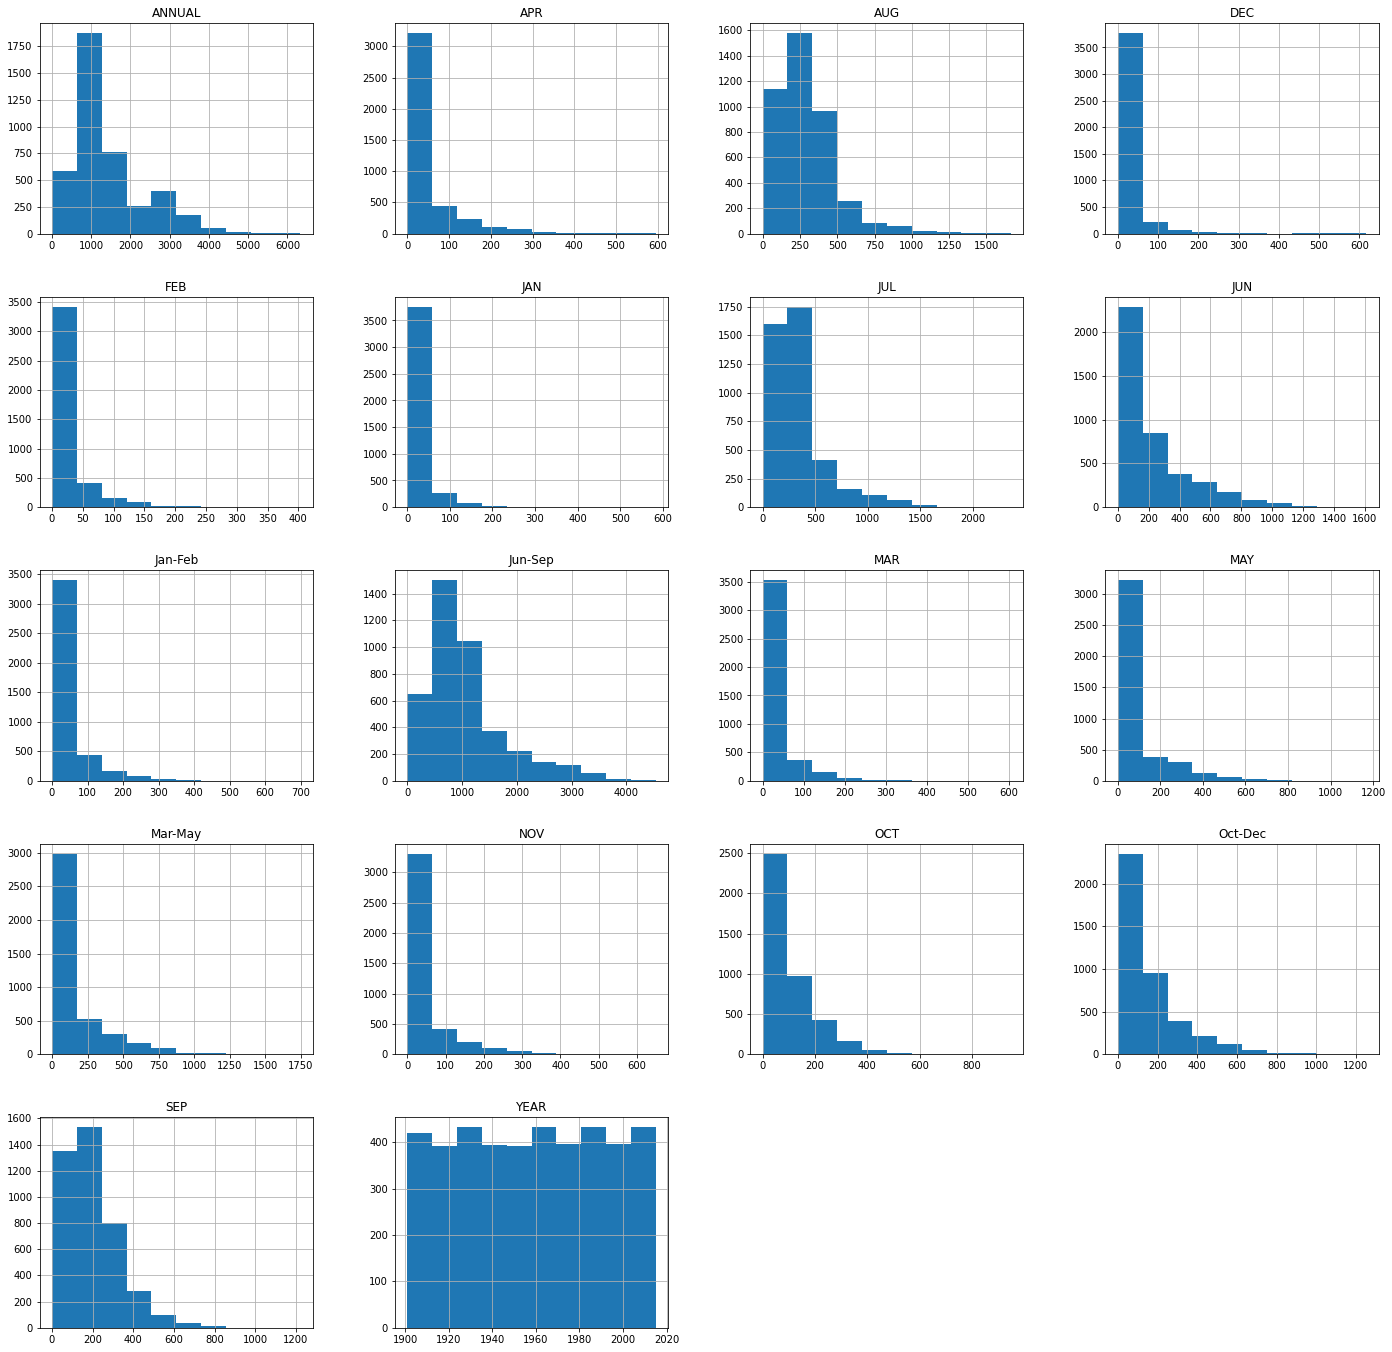

In [0]:
data.hist(figsize=(24,24));

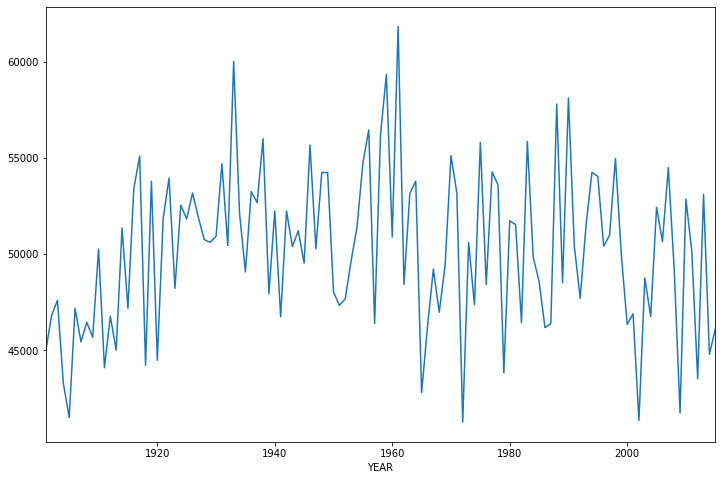

In [0]:
#observation
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

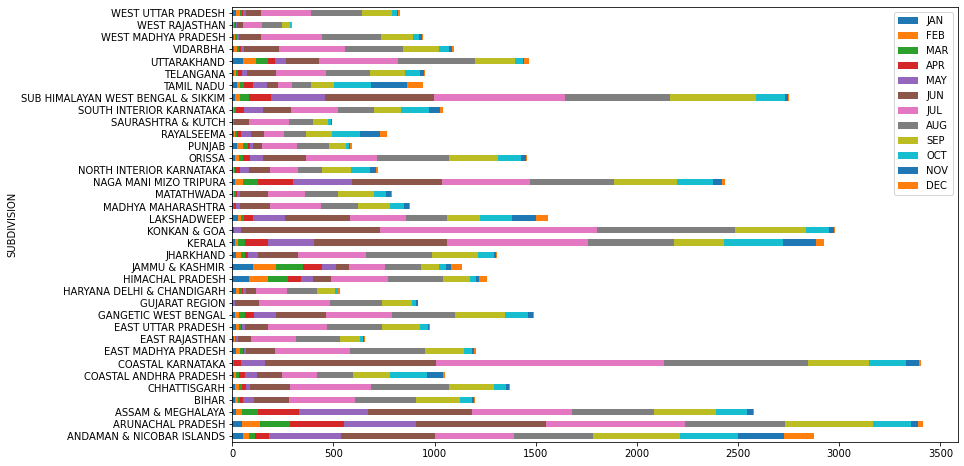

In [0]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

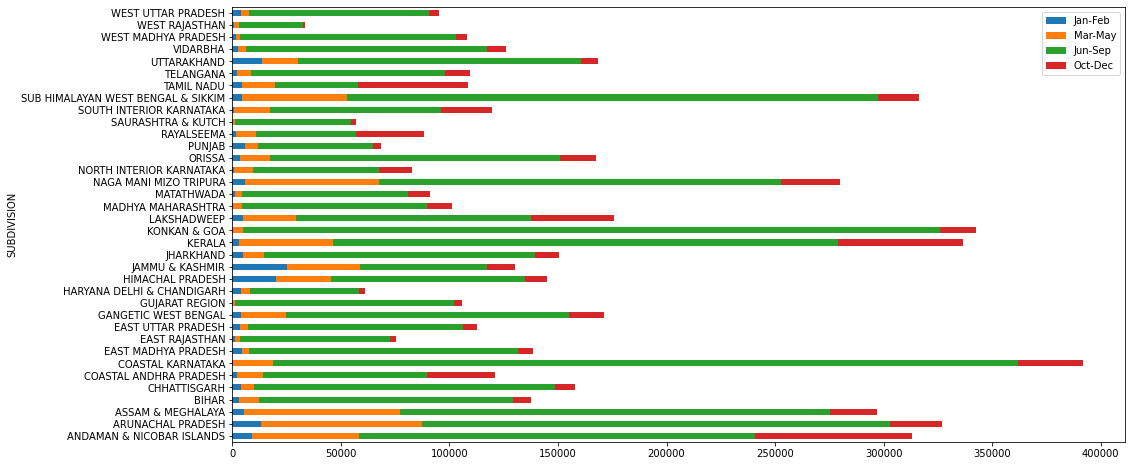

In [0]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

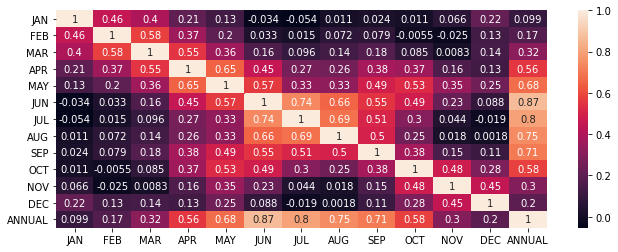

In [0]:

plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [0]:
#predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
#test 2013
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2013]

data_2013 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2013 = None; y_year_2013 = None
for i in range(data_2013.shape[1]-3):
    if X_year_2013 is None:
        X_year_2013 = data_2013[:, i:i+3]
        y_year_2013 = data_2013[:, i+3]
    else:
        X_year_2013 = np.concatenate((X_year_2013, data_2013[:, i:i+3]), axis=0)
        y_year_2013 = np.concatenate((y_year_2013, data_2013[:, i+3]), axis=0)

In [0]:
#test 2014
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2014]

data_2014 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2014 = None; y_year_2014 = None
for i in range(data_2014.shape[1]-3):
    if X_year_2014 is None:
        X_year_2014 = data_2014[:, i:i+3]
        y_year_2014 = data_2014[:, i+3]
    else:
        X_year_2014 = np.concatenate((X_year_2014, data_2014[:, i:i+3]), axis=0)
        y_year_2014 = np.concatenate((y_year_2014, data_2014[:, i+3]), axis=0)

In [0]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015= np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015= np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [0]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

96.40650005052893


In [0]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

MEAN 2013
75.24444444444445 114.58207062372607
Standard deviation 2013
37.949794644770435 22.886024926528513
MEAN 2014
99.04444444444445 127.4087765176486
Standard deviation 2014
66.53876248909538 49.09391868729794
MEAN 2015
130.25555555555556 144.02173981487192
Standard deviation 2015
93.7362625325986 70.53808524890079


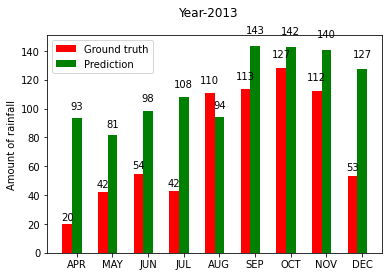

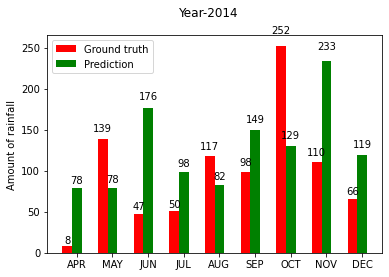

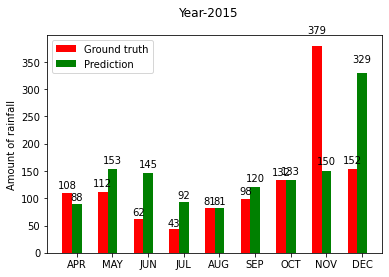

In [0]:
#2013
y_year_pred_2013 = reg.predict(X_year_2013)
#2014
y_year_pred_2014 = reg.predict(X_year_2014)
#2015    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [0]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

127.07883037269494


MEAN 2013
75.24444444444445 82.08654340403962
Standard deviation 2013
37.949794644770435 0.08945710455456146
MEAN 2014
99.04444444444445 82.03089477258443
Standard deviation 2014
66.53876248909538 0.21148027907030484
MEAN 2015
130.25555555555556 82.13505485004751
Standard deviation 2015
93.7362625325986 0.08358644960670371


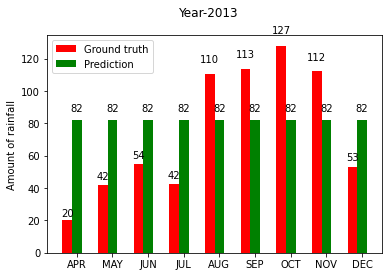

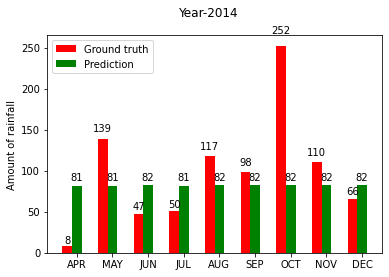

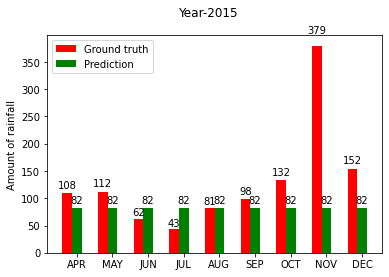

In [0]:
#2013
y_year_pred_2013 = clf.predict(X_year_2013)
#2014
y_year_pred_2014 = clf.predict(X_year_2014)
#2015    
y_year_pred_2015 = clf.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [0]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Using TensorFlow backend.






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                

In [0]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))




Train on 30005 samples, validate on 3334 samples
Epoch 1/10





30005/30005 [==============================] - 3s 107us/step - loss: 19725.7650 - mean_absolute_error: 88.1271 - val_loss: 17537.7677 - val_mean_absolute_error: 85.2902
Epoch 2/10
30005/30005 [==============================] - 2s 81us/step - loss: 18649.9837 - mean_absolute_error: 86.8733 - val_loss: 17459.1540 - val_mean_absolute_error: 85.9677
Epoch 3/10
30005/30005 [==============================] - 2s 74us/step - loss: 18582.8261 - mean_absolute_error: 86.6218 - val_loss: 17294.3587 - val_mean_absolute_error: 85.2419
Epoch 4/10
30005/30005 [==============================] - 2s 69us/step - loss: 18462.4063 - mean_absolute_error: 86.1893 - val_loss: 17292.2859 - val_mean_absolute_error: 84.7999
Epoch 5/10
30005/30005 [==============================] - 2s 64us/step - loss: 18327.2823 - mean_absolute_error: 85.9640 - val_loss: 17192.8809 - val_mean_absolute_error: 82.0557
Epoch 6/10
30005/30005 [=======================

MEAN 2013
75.24444444444445 114.58207062372607
Standard deviation 2013
37.949794644770435 22.886024926528513
MEAN 2014
99.04444444444445 127.4087765176486
Standard deviation 2014
66.53876248909538 49.09391868729794
MEAN 2015
130.25555555555556 144.02173981487192
Standard deviation 2015
93.7362625325986 70.53808524890079


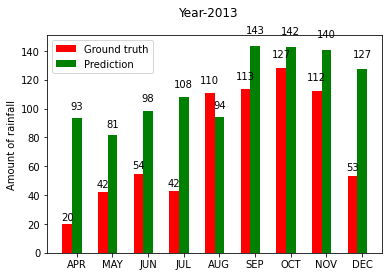

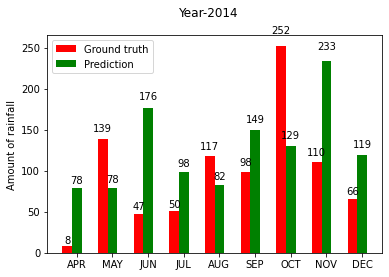

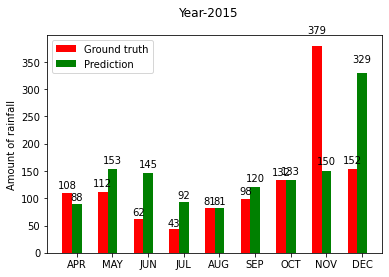

In [0]:
#2013
y_year_pred_2013 = reg.predict(X_year_2013)
#2014
y_year_pred_2014 = reg.predict(X_year_2014)
#2015    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

Linear model:96.40
SVR:127.07
Neural networks:85.65

In [0]:
tn= np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TAMIL NADU'])

X = None; y = None
for i in range(tn.shape[1]-3):
    if X is None:
        X = tn[:, i:i+3]
        y = tn[:, i+3]
    else:
        X = np.concatenate((X, tn[:, i:i+3]), axis=0)
        y = np.concatenate((y, tn[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [0]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

37.419853700246996


MEAN 2013
75.24444444444445 92.53497794341538
Standard deviation 2013
37.949794644770435 18.770123472279195
MEAN 2014
99.04444444444445 98.83157126464404
Standard deviation 2014
66.53876248909538 26.061241681070662
MEAN 2015
130.25555555555556 104.79014811753535
Standard deviation 2015
93.7362625325986 27.631385420897402


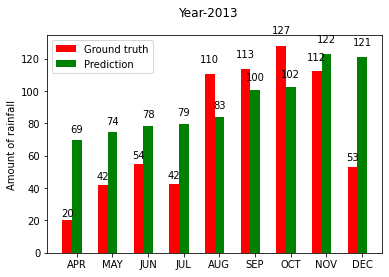

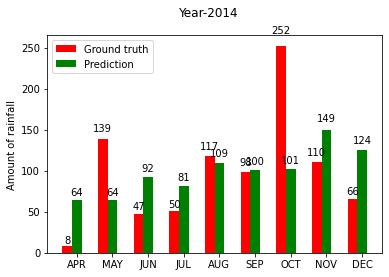

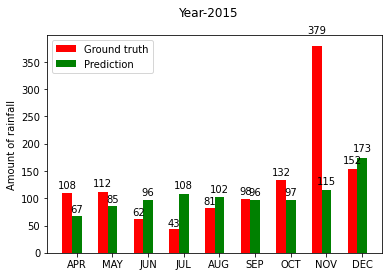

In [0]:
#2013
y_year_pred_2013 = reg.predict(X_year_2013)
#2014
y_year_pred_2014 = reg.predict(X_year_2014)
#2015    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [0]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

39.08083930391495


MEAN 2013
75.24444444444445 78.23027232476677
Standard deviation 2013
37.949794644770435 0.4980891437260813
MEAN 2014
99.04444444444445 78.34304624749765
Standard deviation 2014
66.53876248909538 0.4812692865181383
MEAN 2015
130.25555555555556 78.53124925304176
Standard deviation 2015
93.7362625325986 0.40863077306353507


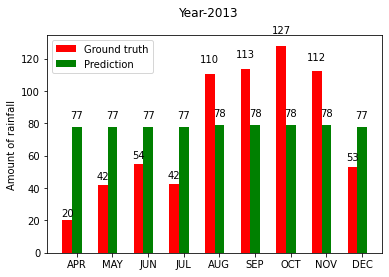

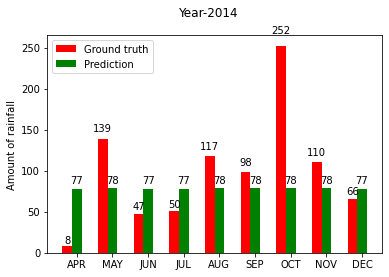

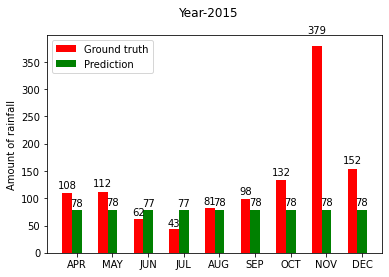

In [0]:
#2013
y_year_pred_2013 = clf.predict(X_year_2013)
#2014
y_year_pred_2014 = clf.predict(X_year_2014)
#2015    
y_year_pred_2015 = clf.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [0]:

model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Train on 921 samples, validate on 103 samples
Epoch 1/10
921/921 [==============================] - 0s 82us/step - loss: 5793.4428 - mean_absolute_error: 58.6329 - val_loss: 5176.3683 - val_mean_absolute_error: 52.2346
Epoch 2/10
921/921 [==============================] - 0s 78us/step - loss: 4733.1812 - mean_absolute_error: 49.3666 - val_loss: 4290.3845 - val_mean_absolute_error: 47.6356
Epoch 3/10
921/921 [==============================] - 0s 76us/step - loss: 4101.4449 - mean_absolute_error: 48.1128 - val_loss: 4052.9427 - val_mean_absolute_error: 46.0275
Epoch 4/10
921/921 [==============================] - 0s 73us/step - loss: 3893.0514 - mean_absolute_error: 46.1079 - val_loss: 3896.8163 - val_mean_absolute_error: 44.6931
Epoch 5/10
921/921 [==============================] - 0s 73us/step - loss: 3787.2429 - mean_absolute_error: 46.1512 - val_loss: 3992.3671 - val_mean_absolute_error: 43.1496
Epoch 6/10
921/921 [==============================] - 0s 72us/step - loss: 3711.2859 - me

MEAN 2013
75.24444444444445 92.53497794341538
Standard deviation 2013
37.949794644770435 18.770123472279195
MEAN 2014
99.04444444444445 98.83157126464404
Standard deviation 2014
66.53876248909538 26.061241681070662
MEAN 2015
130.25555555555556 104.79014811753535
Standard deviation 2015
93.7362625325986 27.631385420897402


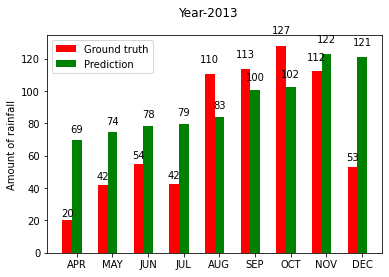

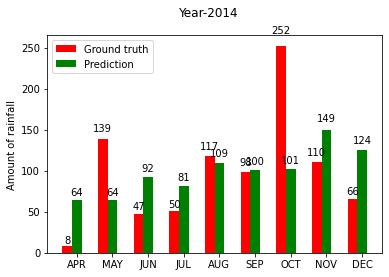

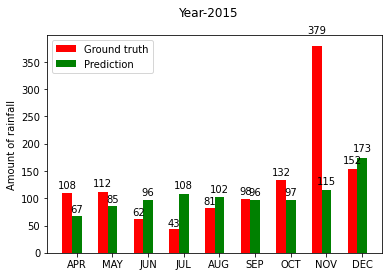

In [0]:
#2013
y_year_pred_2013 = reg.predict(X_year_2013)
#2014
y_year_pred_2014 = reg.predict(X_year_2014)
#2015    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2013")
print (np.mean(y_year_2013),np.mean(y_year_pred_2013))
print ("Standard deviation 2013")
print (np.sqrt(np.var(y_year_2013)),np.sqrt(np.var(y_year_pred_2013)))


print ("MEAN 2014")
print (np.mean(y_year_2014),np.mean(y_year_pred_2014))
print ("Standard deviation 2014")
print (np.sqrt(np.var(y_year_2014)),np.sqrt(np.var(y_year_pred_2014)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2013,y_year_pred_2013,"Year-2013")
plot_graphs(y_year_2014,y_year_pred_2014,"Year-2014")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

Linear Model:37.41
SVR:39.08
NeuralNetwork:33.51